## K-Means Clustering Mini-Project

n this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

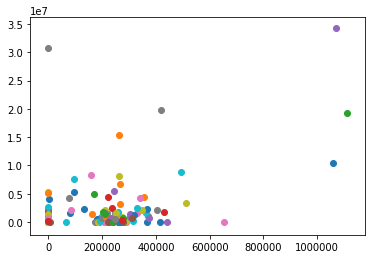

si


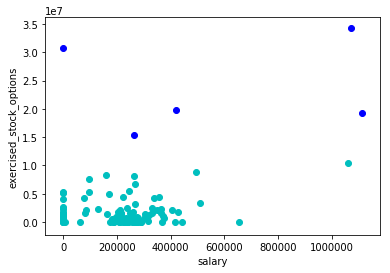

In [31]:
#!/usr/bin/python 
%matplotlib inline
""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """
    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
#feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2] #, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

clustt = KMeans(n_clusters = 2, init = 'random', n_init=10)
clustt.fit(finance_features)
pred = clustt.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    print 'si'
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [30]:
# 1) What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?
#data_dict
# 2) What are the maximum and minimum values taken by “salary”?
stock_lists = []
salary = []
for k in data_dict:
    val = data_dict[k]['exercised_stock_options']
    val_2 = data_dict[k]['salary']
    if val != 'NaN':
        stock_lists.append(val)
    if val_2 != 'NaN':
        salary.append(val_2)
        
print "Maximum and minimum values by the exercised_stock_options: ", min(stock_lists), "and", max(stock_lists)
print "Maximum and minimum values by salary: ", min(salary), "and", max(salary)
    

Maximum and minimum values by the exercised_stock_options:  3285 and 34348384
Maximum and minimum values by salary:  477 and 1111258
